# CS677 Machine Learning Final Project
## Insurance Cost Per Family

by Kelsey Woods and Aayushi Verma

We are using a dataset titled [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) by Kaggle. It lists the medical insurance costs per family and its possibly associated factors.

We recorded a video presentation of our project here: https://youtu.be/MeouPm4Yvh0

In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### Preparation & EDA

We start by performing Exploratory Data Analysis and cleaning on this dataset to prepare for the machine learning process.

In [2]:
# reading data
df = pd.read_csv('data/insurance.csv')

In [3]:
# checking data structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking data content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
for col in df.columns:
    df.loc[df[col] == "yes", col] = 1
    df.loc[df[col] == "no", col] = 0
    df.loc[df[col] == "female", col] = 1
    df.loc[df[col] == "male", col] = 0
    df.loc[df[col] == "southwest", col] = 1
    df.loc[df[col] == "northwest", col] = 2
    df.loc[df[col] == "southeast", col] = 3
    df.loc[df[col] == "northeast", col] = 4

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df[['sex']] = df[['sex']].apply(pd.to_numeric, errors='coerce')
df[['smoker']] = df[['smoker']].apply(pd.to_numeric, errors='coerce')
df[['region']] = df[['region']].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [10]:
df.fillna(df.mean())

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [11]:
# Drop duplicates based on all columns
df_no_duplicates = df.drop_duplicates()

# Drop duplicates based on specific columns
columns_to_check = ['bmi', 'charges']  # Replace with the column names you want to consider
df_no_duplicates_specific = df.drop_duplicates(subset=columns_to_check)

# Print the shape of the resulting DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after dropping all duplicates:", df_no_duplicates.shape)
print("DataFrame shape after dropping duplicates based on specific columns:", df_no_duplicates_specific.shape)


Original DataFrame shape: (1338, 7)
DataFrame shape after dropping all duplicates: (1337, 7)
DataFrame shape after dropping duplicates based on specific columns: (1337, 7)


Text(0.5, 1.0, 'Correlation Matrix of Variables')

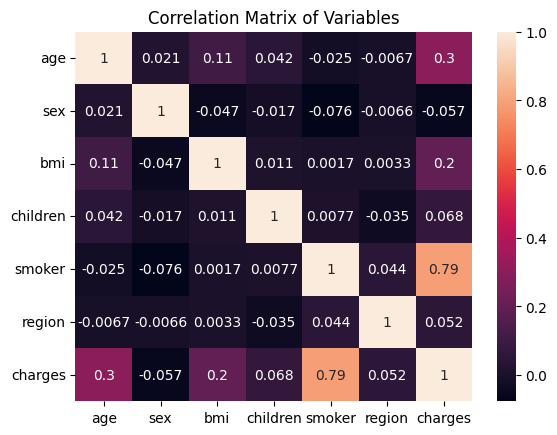

In [70]:
# performing label encoding of data and displaying correlation matrix
df_e = pd.get_dummies(df)
corrMatrix_e = df_e.corr()
sns.heatmap(corrMatrix_e, annot=True)
plt.title("Correlation Matrix of Variables")

In [13]:
# checking data structure again
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Text(0.5, 0, 'Total cost ($)')

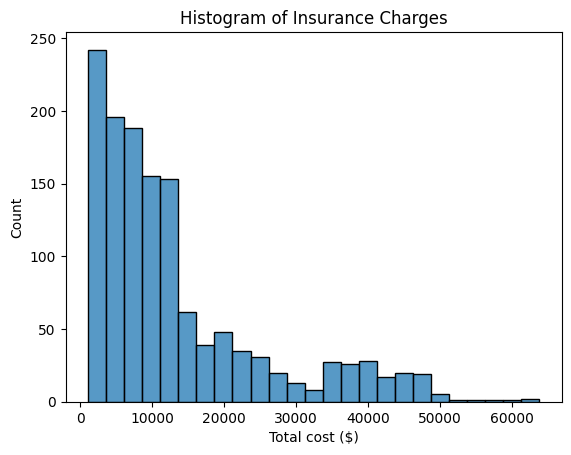

In [15]:
# EDA for one column
sns.histplot(df['charges'], bins=25)
plt.title('Histogram of Insurance Charges')
plt.xlabel('Total cost ($)')

Text(0.5, 0, 'Total cost ($)')

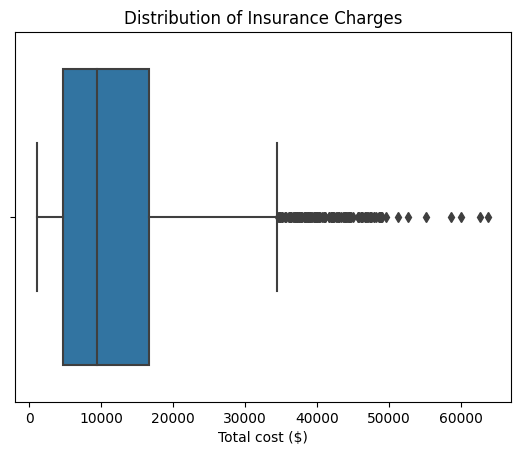

In [16]:
sns.boxplot(x = df['charges'])
plt.title('Distribution of Insurance Charges')
plt.xlabel('Total cost ($)')

Text(0.5, 0, 'BMI')

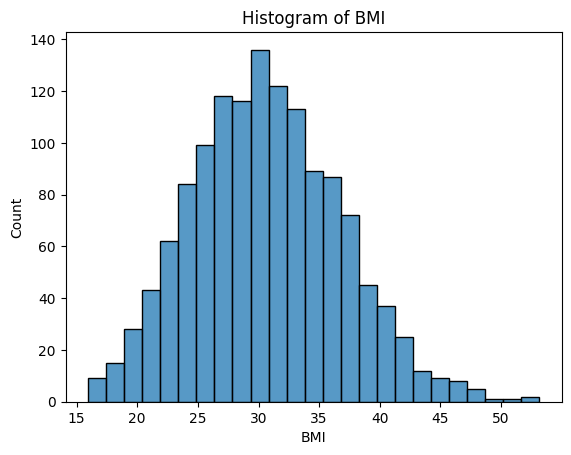

In [17]:
# EDA for another column
sns.histplot(df['bmi'], bins=25)
plt.title('Histogram of BMI')
plt.xlabel('BMI')

Text(0.5, 0, 'BMI')

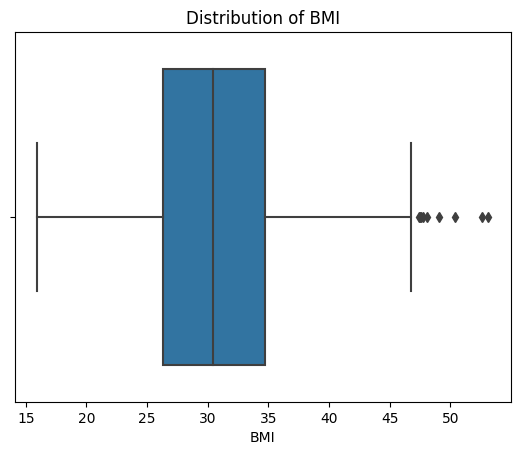

In [18]:
sns.boxplot(x = df['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')

Text(0, 0.5, 'Total cost ($)')

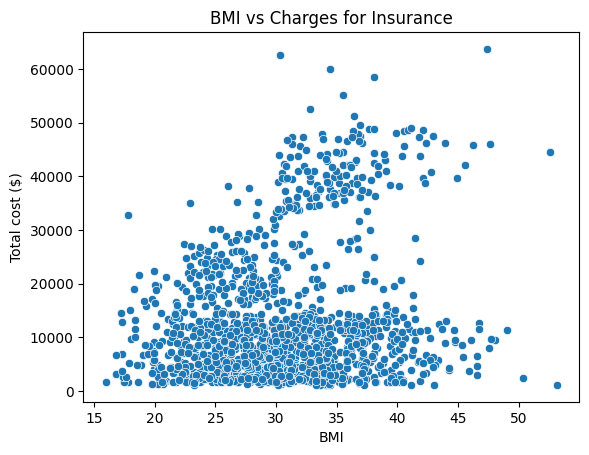

In [19]:
# scatterplot time!
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges for Insurance')
plt.xlabel('BMI')
plt.ylabel('Total cost ($)')

### Machine Learning

Now we perform machine learning on our cleaned dataset.

In [20]:
def a_rsquare(X, r2):
    """
    Function to calculate adjusted R-squared value.

    Input
    -----
    X (pd.DataFrame): Dataframe with values.
    r2 (float): R-squared value.

    Output
    ------
    a_rsquare (float): Adjusted R-squared value.
    """
    # p is the num of features in the dataset
    p = len(X.columns)
    # n is the total num of rows in the dataset
    n = len(X)

    numerator = (1 - r2) * (n - 1)
    denominator = n - p - 1
    a_rsquare = 1 - (numerator / denominator)
    return a_rsquare

In [21]:
X = df.drop('charges', axis=1)
y = df['charges']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [23]:
print("Shape of df:", df.shape)

Shape of df: (1338, 7)


In [24]:
df['bmi'] = df['bmi'].astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["ml_algorithm","mae","mse","rmse","r2","adjusted_r2"]
normal_results = pd.DataFrame(columns=column_names)
column_names = ["ml_algorithm","mae","mse","rmse","r2","adjusted_r2"]
cv_results = pd.DataFrame(columns=column_names)

### 1. Decision Tree Regressor

In [29]:
# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=90)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35353917.33767319
R-squared: 0.7722756443936125


In [30]:
normal_results.loc[len(normal_results)] = [
    "Decision Tree Regressor",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2) # adjusted r2
]
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249


In [31]:
# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=50)

# Perform cross-validation for Decision Tree Regressor
cv_scores_dt = cross_val_score(dt_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_dt = (-cv_scores_dt)**0.5

print("Cross-Validation RMSE scores for Decision Tree Regressor:", cv_rmse_dt)
print("Mean CV RMSE for Decision Tree Regressor:", cv_rmse_dt.mean())

# Train the Decision Tree Regressor model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the Decision Tree Regressor model using Mean Squared Error and R-squared
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Mean Squared Error:", mse_dt)
print("Decision Tree Regressor R-squared:", r2_dt)

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform cross-validation for Gradient Boosting Regressor
cv_scores_gb = cross_val_score(gb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_gb = (-cv_scores_gb)**0.5

print("Cross-Validation RMSE scores for Gradient Boosting Regressor:", cv_rmse_gb)
print("Mean CV RMSE for Gradient Boosting Regressor:", cv_rmse_gb.mean())

Cross-Validation RMSE scores for Decision Tree Regressor: [6065.5572263  5832.94728743 7234.49801812 6868.62140027 5614.80720552]
Mean CV RMSE for Decision Tree Regressor: 6323.28622752859
Decision Tree Regressor Mean Squared Error: 41017095.039880045
Decision Tree Regressor R-squared: 0.7357975511571022
Cross-Validation RMSE scores for Gradient Boosting Regressor: [4868.6942485  3623.50968542 4839.26547917 5341.30504816 4885.22322473]
Mean CV RMSE for Gradient Boosting Regressor: 4711.599537197328


In [32]:
cv_results.loc[len(cv_results)] = [
    "Decision Tree Regressor",
    mae_dt, # mae
    mse_dt, # mse
    np.sqrt(mse_dt), # rmse
    r2_dt, # r2
    a_rsquare(X, r2_dt) # adjusted r2
]
cv_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2924.613762,4.101710e+07,6404.458997,0.735798,0.734607


### 2. Linear Regression

In [33]:
# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33927609.01712134
R-squared: 0.7814628906071344


In [34]:
normal_results.loc[len(normal_results)] = [
    "Linear Regression",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2) # adjusted r2
]
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249
1,Linear Regression,2684.822145,3.392761e+07,5824.741112,0.781463,0.780478


In [35]:
# Perform cross-validation for Linear Regression
cv_scores_lr = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lr = (-cv_scores_lr)**0.5

print("Cross-Validation RMSE scores for Linear Regression:", cv_rmse_lr)
print("Mean CV RMSE for Linear Regression:", cv_rmse_lr.mean())

# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the Linear Regression model using Mean Squared Error and R-squared
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Mean Squared Error:", mse_lr)
print("Linear Regression R-squared:", r2_lr)


Cross-Validation RMSE scores for Linear Regression: [6322.96146928 5669.44617093 5986.80204227 6830.13621179 5912.55444816]
Mean CV RMSE for Linear Regression: 6144.380068484391
Linear Regression Mean Squared Error: 33927609.01712134
Linear Regression R-squared: 0.7814628906071344


In [36]:
cv_results.loc[len(cv_results)] = [
    "Linear Regression",
    mae_lr, # mae
    mse_lr, # mse
    np.sqrt(mse_lr), # rmse
    r2_lr, # r2
    a_rsquare(X, r2_lr) # adjusted r2
]
cv_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2924.613762,4.101710e+07,6404.458997,0.735798,0.734607
1,Linear Regression,4206.420041,3.392761e+07,5824.741112,0.781463,0.780478


In [37]:
# Define parameter grid for Ridge and Lasso
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}

# Create Ridge and Lasso models
ridge_regressor = Ridge()
lasso_regressor = Lasso()

# Initialize GridSearchCV for Ridge and Lasso
grid_search_ridge = GridSearchCV(ridge_regressor, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso_regressor, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV for Ridge and Lasso
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and models for Ridge and Lasso
best_params_ridge = grid_search_ridge.best_params_
best_params_lasso = grid_search_lasso.best_params_
best_ridge_model = grid_search_ridge.best_estimator_
best_lasso_model = grid_search_lasso.best_estimator_

# Evaluate the best Ridge model
y_pred_best_ridge = best_ridge_model.predict(X_test)
best_mse_ridge = mean_squared_error(y_test, y_pred_best_ridge)

# Evaluate the best Lasso model
y_pred_best_lasso = best_lasso_model.predict(X_test)
best_mse_lasso = mean_squared_error(y_test, y_pred_best_lasso)

print("Best Ridge Parameters:", best_params_ridge)
print("Best Ridge Model MSE:", best_mse_ridge)

print("Best Lasso Parameters:", best_params_lasso)
print("Best Lasso Model MSE:", best_mse_lasso)


Best Ridge Parameters: {'alpha': 1.0}
Best Ridge Model MSE: 33967092.307571344
Best Lasso Parameters: {'alpha': 10.0}
Best Lasso Model MSE: 33951074.14634581


### 3. Support Vector Regression

In [38]:
# Create a Support Vector Regression model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 166472410.6072576
R-squared: -0.07229482010987542


In [39]:
normal_results.loc[len(normal_results)] = [
    "Support Vector Machine",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2) # adjusted r2
]
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249
1,Linear Regression,2684.822145,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129


In [40]:
# Perform cross-validation for Support Vector Regression
cv_scores_svr = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_svr = (-cv_scores_svr)**0.5

print("Cross-Validation RMSE scores for Support Vector Regression:", cv_rmse_svr)
print("Mean CV RMSE for Support Vector Regression:", cv_rmse_svr.mean())

# Train the Support Vector Regression model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the Support Vector Regression model using Mean Squared Error and R-squared
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Mean Squared Error:", mse_svr)
print("Support Vector Regression R-squared:", r2_svr)

Cross-Validation RMSE scores for Support Vector Regression: [12529.09152249 13759.68557414 11787.95019551 12261.64767647
 12568.19766808]
Mean CV RMSE for Support Vector Regression: 12581.31452733684
Support Vector Regression Mean Squared Error: 166472410.6072576
Support Vector Regression R-squared: -0.07229482010987542


In [41]:
cv_results.loc[len(cv_results)] = [
    "Support Vector Machine",
    mae_svr, # mae
    mse_svr, # mse
    np.sqrt(mse_svr), # rmse
    r2_svr, # r2
    a_rsquare(X, r2_svr) # adjusted r2
]
cv_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2924.613762,4.101710e+07,6404.458997,0.735798,0.734607
1,Linear Regression,4206.420041,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129


In [42]:
# Define parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 'auto']
}

# Create SVR model
svr_regressor = SVR()

# Initialize GridSearchCV for SVR
grid_search = GridSearchCV(svr_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Model MSE:", best_mse)


Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
Best Model MSE: 147100970.99728963


### 4. Lasso Regression

In [43]:
# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33930924.6905315
R-squared: 0.7814415334380399


In [44]:
normal_results.loc[len(normal_results)] = [
    "Lasso Regression",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2) # adjusted r2
]
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249
1,Linear Regression,2684.822145,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129
3,Lasso Regression,4207.104528,3.393092e+07,5825.025724,0.781442,0.780456


In [45]:
# Perform cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lasso = (-cv_scores_lasso)**0.5

print("Cross-Validation RMSE scores for Lasso Regression:", cv_rmse_lasso)
print("Mean CV RMSE for Lasso Regression:", cv_rmse_lasso.mean())

# Train the Lasso Regression model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso Regression model using Mean Squared Error and R-squared
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)

Cross-Validation RMSE scores for Lasso Regression: [6322.82314371 5669.33391037 5986.49657294 6829.67195415 5912.7317027 ]
Mean CV RMSE for Lasso Regression: 6144.211456773044
Lasso Regression Mean Squared Error: 33930924.6905315
Lasso Regression R-squared: 0.7814415334380399


In [46]:
cv_results.loc[len(cv_results)] = [
    "Lasso Regression",
    mae_lasso, # mae
    mse_lasso, # mse
    np.sqrt(mse_lasso), # rmse
    r2_lasso, # r2
    a_rsquare(X, r2_lasso) # adjusted r2
]
cv_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2924.613762,4.101710e+07,6404.458997,0.735798,0.734607
1,Linear Regression,4206.420041,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129
3,Lasso Regression,4207.104528,3.393092e+07,5825.025724,0.781442,0.780456


### 4. Random Forest

In [47]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Perform cross-validation for Random Forest Regressor
cv_scores_rf = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = (-cv_scores_rf)**0.5

print("Cross-Validation RMSE scores for Random Forest Regressor:", cv_rmse_rf)
print("Mean CV RMSE for Random Forest Regressor:", cv_rmse_rf.mean())

# Train the Random Forest Regressor model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest Regressor model using Mean Squared Error and R-squared
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Mean Squared Error:", mse_rf)
print("Random Forest Regressor R-squared:", r2_rf)

Cross-Validation RMSE scores for Random Forest Regressor: [5108.04909605 4006.23910113 5115.00633924 5478.77501352 5020.05101665]
Mean CV RMSE for Random Forest Regressor: 4945.624113316784
Random Forest Regressor Mean Squared Error: 21637736.594993167
Random Forest Regressor R-squared: 0.8606253565676333


In [48]:
cv_results.loc[len(cv_results)] = [
    "Random Forest Regressor",
    mae_rf, # mae
    mse_rf, # mse
    np.sqrt(mse_rf), # rmse
    r2_rf, # r2
    a_rsquare(X, r2_rf) # adjusted r2
]
cv_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2924.613762,4.101710e+07,6404.458997,0.735798,0.734607
1,Linear Regression,4206.420041,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129
3,Lasso Regression,4207.104528,3.393092e+07,5825.025724,0.781442,0.780456
4,Random Forest Regressor,2570.165460,2.163774e+07,4651.638055,0.860625,0.859997


### Gradient Boosting

In [49]:
# Train the Gradient Boosting Regressor model
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the Gradient Boosting Regressor model using Mean Squared Error and R-squared
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Mean Squared Error:", mse_gb)
print("Gradient Boosting Regressor R-squared:", r2_gb)

Gradient Boosting Regressor Mean Squared Error: 18979979.039642848
Gradient Boosting Regressor R-squared: 0.8777447077520979


In [50]:
normal_results.loc[len(normal_results)] = [
    "Gradient Boosting Regressor",
    mae_gb, # mae
    mse_gb, # mse
    np.sqrt(mse_gb), # rmse
    r2_gb, # r2
    a_rsquare(X, r2_gb) # adjusted r2
]
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249
1,Linear Regression,2684.822145,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129
3,Lasso Regression,4207.104528,3.393092e+07,5825.025724,0.781442,0.780456
4,Gradient Boosting Regressor,2416.156153,1.897998e+07,4356.601777,0.877745,0.877194


### Overfitting and Underfitting Check

#### Linear Regression

In [51]:
# Create linear regression models with different complexities
model_underfit = LinearRegression()
model_goodfit = LinearRegression()
model_overfit = LinearRegression()

# Train the models
model_underfit.fit(X_train, y_train)
model_goodfit.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_underfit_train = model_underfit.predict(X_train)
y_pred_goodfit_train = model_goodfit.predict(X_train)
y_pred_overfit_train = model_overfit.predict(X_train)

y_pred_underfit_test = model_underfit.predict(X_test)
y_pred_goodfit_test = model_goodfit.predict(X_test)
y_pred_overfit_test = model_overfit.predict(X_test)

# Calculate performance metrics
mse_underfit_train = mean_squared_error(y_train, y_pred_underfit_train)
mse_goodfit_train = mean_squared_error(y_train, y_pred_goodfit_train)
mse_overfit_train = mean_squared_error(y_train, y_pred_overfit_train)

mse_underfit_test = mean_squared_error(y_test, y_pred_underfit_test)
mse_goodfit_test = mean_squared_error(y_test, y_pred_goodfit_test)
mse_overfit_test = mean_squared_error(y_test, y_pred_overfit_test)

r2_underfit_train = r2_score(y_train, y_pred_underfit_train)
r2_goodfit_train = r2_score(y_train, y_pred_goodfit_train)
r2_overfit_train = r2_score(y_train, y_pred_overfit_train)

r2_underfit_test = r2_score(y_test, y_pred_underfit_test)
r2_goodfit_test = r2_score(y_test, y_pred_goodfit_test)
r2_overfit_test = r2_score(y_test, y_pred_overfit_test)

# Print the results
print("MSE and R-squared scores for different models:")
print("Underfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_train, r2_underfit_train))
print("Good Fit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_train, r2_goodfit_train))
print("Overfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_train, r2_overfit_train))
print("Underfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_test, r2_underfit_test))
print("Good Fit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_test, r2_goodfit_test))
print("Overfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_test, r2_overfit_test))

MSE and R-squared scores for different models:
Underfit (Training) - MSE: 37313600.5074, R-squared: 0.7415
Good Fit (Training) - MSE: 37313600.5074, R-squared: 0.7415
Overfit (Training) - MSE: 37313600.5074, R-squared: 0.7415
Underfit (Test) - MSE: 33927609.0171, R-squared: 0.7815
Good Fit (Test) - MSE: 33927609.0171, R-squared: 0.7815
Overfit (Test) - MSE: 33927609.0171, R-squared: 0.7815


#### Random Forest

In [52]:
model_underfit = RandomForestRegressor()
model_goodfit = RandomForestRegressor()
model_overfit = RandomForestRegressor()

# Train the models
model_underfit.fit(X_train, y_train)
model_goodfit.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_underfit_train = model_underfit.predict(X_train)
y_pred_goodfit_train = model_goodfit.predict(X_train)
y_pred_overfit_train = model_overfit.predict(X_train)

y_pred_underfit_test = model_underfit.predict(X_test)
y_pred_goodfit_test = model_goodfit.predict(X_test)
y_pred_overfit_test = model_overfit.predict(X_test)

# Calculate performance metrics
mse_underfit_train = mean_squared_error(y_train, y_pred_underfit_train)
mse_goodfit_train = mean_squared_error(y_train, y_pred_goodfit_train)
mse_overfit_train = mean_squared_error(y_train, y_pred_overfit_train)

mse_underfit_test = mean_squared_error(y_test, y_pred_underfit_test)
mse_goodfit_test = mean_squared_error(y_test, y_pred_goodfit_test)
mse_overfit_test = mean_squared_error(y_test, y_pred_overfit_test)

r2_underfit_train = r2_score(y_train, y_pred_underfit_train)
r2_goodfit_train = r2_score(y_train, y_pred_goodfit_train)
r2_overfit_train = r2_score(y_train, y_pred_overfit_train)

r2_underfit_test = r2_score(y_test, y_pred_underfit_test)
r2_goodfit_test = r2_score(y_test, y_pred_goodfit_test)
r2_overfit_test = r2_score(y_test, y_pred_overfit_test)

# Print the results
print("MSE and R-squared scores for different models:")
print("Underfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_train, r2_underfit_train))
print("Good Fit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_train, r2_goodfit_train))
print("Overfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_train, r2_overfit_train))
print("Underfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_test, r2_underfit_test))
print("Good Fit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_test, r2_goodfit_test))
print("Overfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_test, r2_overfit_test))

MSE and R-squared scores for different models:
Underfit (Training) - MSE: 3501515.8486, R-squared: 0.9757
Good Fit (Training) - MSE: 3469503.6272, R-squared: 0.9760
Overfit (Training) - MSE: 3697941.8490, R-squared: 0.9744
Underfit (Test) - MSE: 22055574.2296, R-squared: 0.8579
Good Fit (Test) - MSE: 21938171.1899, R-squared: 0.8587
Overfit (Test) - MSE: 21275061.3911, R-squared: 0.8630


In [53]:
# Create Lasso models with different complexity levels
model_underfit = Lasso(alpha=1.0)  # High regularization
model_goodfit = Lasso(alpha=0.1)   # Moderate regularization
model_overfit = Lasso(alpha=0.01)  # Low regularization

# Train the models
model_underfit.fit(X_train, y_train)
model_goodfit.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_underfit_train = model_underfit.predict(X_train)
y_pred_goodfit_train = model_goodfit.predict(X_train)
y_pred_overfit_train = model_overfit.predict(X_train)

y_pred_underfit_test = model_underfit.predict(X_test)
y_pred_goodfit_test = model_goodfit.predict(X_test)
y_pred_overfit_test = model_overfit.predict(X_test)

# Calculate performance metrics
mse_underfit_train = mean_squared_error(y_train, y_pred_underfit_train)
mse_goodfit_train = mean_squared_error(y_train, y_pred_goodfit_train)
mse_overfit_train = mean_squared_error(y_train, y_pred_overfit_train)

mse_underfit_test = mean_squared_error(y_test, y_pred_underfit_test)
mse_goodfit_test = mean_squared_error(y_test, y_pred_goodfit_test)
mse_overfit_test = mean_squared_error(y_test, y_pred_overfit_test)

r2_underfit_train = r2_score(y_train, y_pred_underfit_train)
r2_goodfit_train = r2_score(y_train, y_pred_goodfit_train)
r2_overfit_train = r2_score(y_train, y_pred_overfit_train)

r2_underfit_test = r2_score(y_test, y_pred_underfit_test)
r2_goodfit_test = r2_score(y_test, y_pred_goodfit_test)
r2_overfit_test = r2_score(y_test, y_pred_overfit_test)

# Print the results
print("MSE and R-squared scores for different models:")
print("Underfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_train, r2_underfit_train))
print("Good Fit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_train, r2_goodfit_train))
print("Overfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_train, r2_overfit_train))
print("Underfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_test, r2_underfit_test))
print("Good Fit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_test, r2_goodfit_test))
print("Overfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_test, r2_overfit_test))

MSE and R-squared scores for different models:
Underfit (Training) - MSE: 37313612.7984, R-squared: 0.7415
Good Fit (Training) - MSE: 37313600.6303, R-squared: 0.7415
Overfit (Training) - MSE: 37313600.5086, R-squared: 0.7415
Underfit (Test) - MSE: 33930924.6905, R-squared: 0.7814
Good Fit (Test) - MSE: 33927939.5353, R-squared: 0.7815
Overfit (Test) - MSE: 33927642.0586, R-squared: 0.7815


#### DECISION TREE

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Regressor models with different depths
model_underfit = DecisionTreeRegressor(max_depth=3)  # Shallow tree
model_goodfit = DecisionTreeRegressor(max_depth=10)  # Moderate depth
model_overfit = DecisionTreeRegressor(max_depth=None)  # Deep tree (potential overfitting)

# Train the models
model_underfit.fit(X_train, y_train)
model_goodfit.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_underfit_train = model_underfit.predict(X_train)
y_pred_goodfit_train = model_goodfit.predict(X_train)
y_pred_overfit_train = model_overfit.predict(X_train)

y_pred_underfit_test = model_underfit.predict(X_test)
y_pred_goodfit_test = model_goodfit.predict(X_test)
y_pred_overfit_test = model_overfit.predict(X_test)

# Calculate performance metrics
mse_underfit_train = mean_squared_error(y_train, y_pred_underfit_train)
mse_goodfit_train = mean_squared_error(y_train, y_pred_goodfit_train)
mse_overfit_train = mean_squared_error(y_train, y_pred_overfit_train)

mse_underfit_test = mean_squared_error(y_test, y_pred_underfit_test)
mse_goodfit_test = mean_squared_error(y_test, y_pred_goodfit_test)
mse_overfit_test = mean_squared_error(y_test, y_pred_overfit_test)

r2_underfit_train = r2_score(y_train, y_pred_underfit_train)
r2_goodfit_train = r2_score(y_train, y_pred_goodfit_train)
r2_overfit_train = r2_score(y_train, y_pred_overfit_train)

r2_underfit_test = r2_score(y_test, y_pred_underfit_test)
r2_goodfit_test = r2_score(y_test, y_pred_goodfit_test)
r2_overfit_test = r2_score(y_test, y_pred_overfit_test)

# Print the results
print("MSE and R-squared scores for different models:")
print("Underfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_train, r2_underfit_train))
print("Good Fit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_train, r2_goodfit_train))
print("Overfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_train, r2_overfit_train))
print("Underfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_test, r2_underfit_test))
print("Good Fit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_test, r2_goodfit_test))
print("Overfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_test, r2_overfit_test))

MSE and R-squared scores for different models:
Underfit (Training) - MSE: 21120357.0162, R-squared: 0.8537
Good Fit (Training) - MSE: 4718019.6223, R-squared: 0.9673
Overfit (Training) - MSE: 244239.5544, R-squared: 0.9983
Underfit (Test) - MSE: 22812669.8523, R-squared: 0.8531
Good Fit (Test) - MSE: 36938408.7245, R-squared: 0.7621
Overfit (Test) - MSE: 41834357.1781, R-squared: 0.7305


#### SVR

In [55]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR models with different complexity levels
model_underfit = SVR(C=1.0, epsilon=0.2)  # High regularization
model_goodfit = SVR(C=10.0, epsilon=0.1)  # Moderate regularization
model_overfit = SVR(C=100.0, epsilon=0.05)  # Low regularization

# Train the models
model_underfit.fit(X_train_scaled, y_train)
model_goodfit.fit(X_train_scaled, y_train)
model_overfit.fit(X_train_scaled, y_train)

# Make predictions on training and test data
y_pred_underfit_train = model_underfit.predict(X_train_scaled)
y_pred_goodfit_train = model_goodfit.predict(X_train_scaled)
y_pred_overfit_train = model_overfit.predict(X_train_scaled)

y_pred_underfit_test = model_underfit.predict(X_test_scaled)
y_pred_goodfit_test = model_goodfit.predict(X_test_scaled)
y_pred_overfit_test = model_overfit.predict(X_test_scaled)

# Calculate performance metrics
mse_underfit_train = mean_squared_error(y_train, y_pred_underfit_train)
mse_goodfit_train = mean_squared_error(y_train, y_pred_goodfit_train)
mse_overfit_train = mean_squared_error(y_train, y_pred_overfit_train)

mse_underfit_test = mean_squared_error(y_test, y_pred_underfit_test)
mse_goodfit_test = mean_squared_error(y_test, y_pred_goodfit_test)
mse_overfit_test = mean_squared_error(y_test, y_pred_overfit_test)

r2_underfit_train = r2_score(y_train, y_pred_underfit_train)
r2_goodfit_train = r2_score(y_train, y_pred_goodfit_train)
r2_overfit_train = r2_score(y_train, y_pred_overfit_train)

r2_underfit_test = r2_score(y_test, y_pred_underfit_test)
r2_goodfit_test = r2_score(y_test, y_pred_goodfit_test)
r2_overfit_test = r2_score(y_test, y_pred_overfit_test)

# Print the results
print("MSE and R-squared scores for different models:")
print("Underfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_train, r2_underfit_train))
print("Good Fit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_train, r2_goodfit_train))
print("Overfit (Training) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_train, r2_overfit_train))
print("Underfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_underfit_test, r2_underfit_test))
print("Good Fit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_goodfit_test, r2_goodfit_test))
print("Overfit (Test) - MSE: {:.4f}, R-squared: {:.4f}".format(mse_overfit_test, r2_overfit_test))


MSE and R-squared scores for different models:
Underfit (Training) - MSE: 157685119.5914, R-squared: -0.0925
Good Fit (Training) - MSE: 150931005.6611, R-squared: -0.0457
Overfit (Training) - MSE: 102196458.9288, R-squared: 0.2919
Underfit (Test) - MSE: 165809589.8863, R-squared: -0.0680
Good Fit (Test) - MSE: 158256091.6828, R-squared: -0.0194
Overfit (Test) - MSE: 105415585.0116, R-squared: 0.3210


## Results

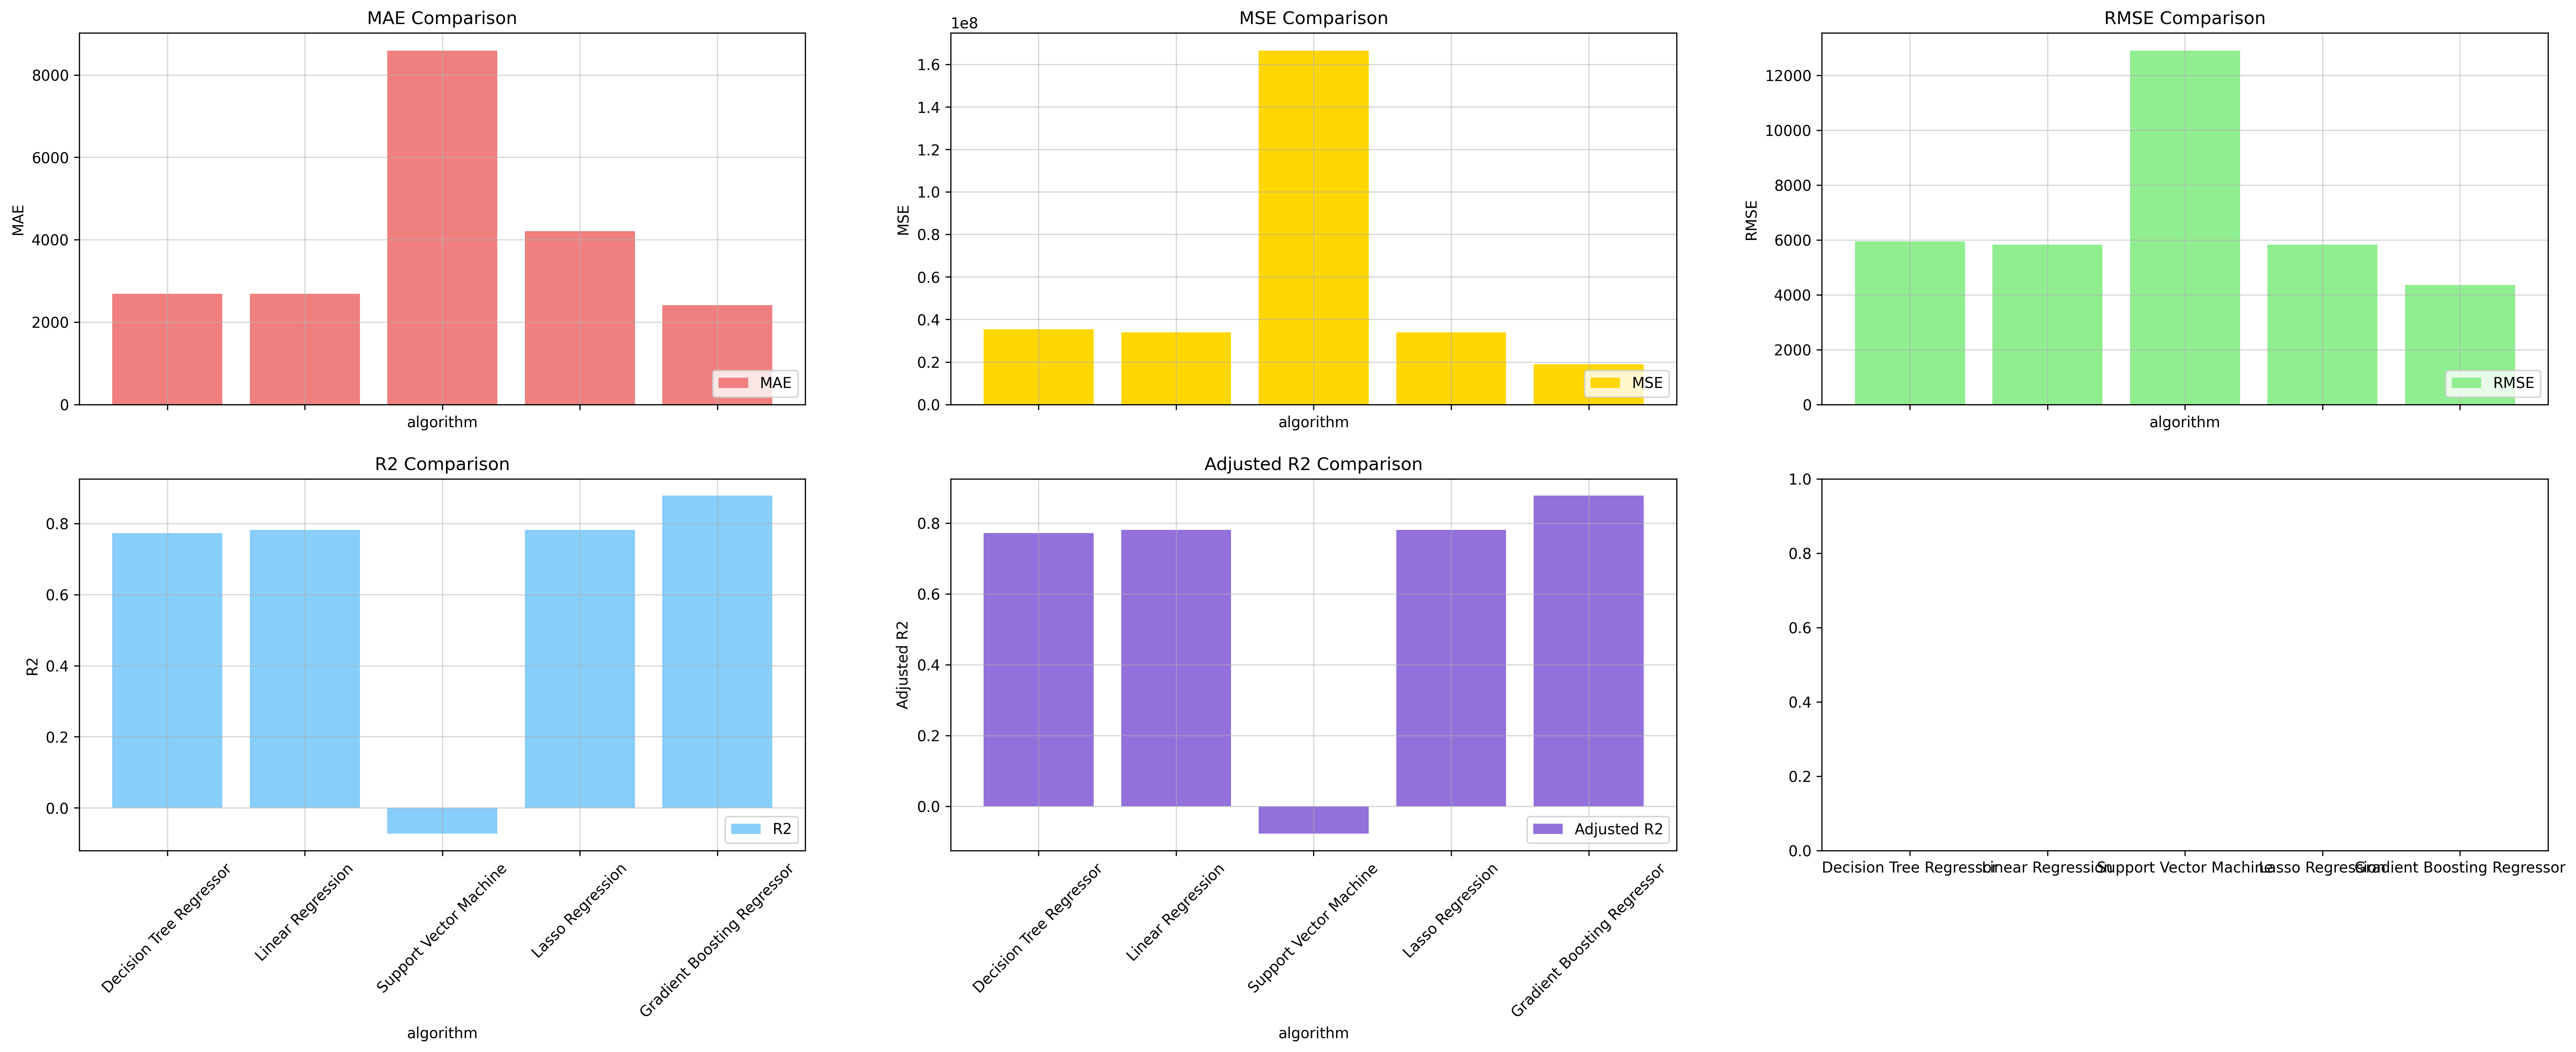

In [57]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(30, 10), dpi=300)
x_labels = normal_results['ml_algorithm']
indices = np.arange(len(x_labels))
width = 0.3

#row=0, col=0
ax[0,0].bar(indices,normal_results['mae'],color="lightcoral",alpha=1,label="MAE")
ax[0,0].grid(True,alpha=0.5)
# ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel("algorithm")
ax[0,0].set_ylabel("MAE")
ax[0,0].set_title("MAE Comparison")
ax[0,0].legend(loc='lower right')
ax[0,0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[0,1].bar(indices,normal_results['mse'],color="gold",alpha=1,label="MSE")
ax[0,1].grid(True,alpha=0.5)
# ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel("algorithm")
ax[0,1].set_ylabel("MSE")
ax[0,1].set_title("MSE Comparison")
ax[0,1].legend(loc='lower right')
ax[0,1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[0,2].bar(indices,normal_results['rmse'],color="lightgreen",alpha=1,label="RMSE")
ax[0,2].grid(True,alpha=0.5)
# ax[0,2].set_ylim(0,1)
ax[0,2].set_xlabel("algorithm")
ax[0,2].set_ylabel("RMSE")
ax[0,2].set_title("RMSE Comparison")
ax[0,2].legend(loc='lower right')
ax[0,2].set_xticks(indices, x_labels, rotation=45)

#row=1, col=0
ax[1,0].bar(indices,normal_results['r2'],color="lightskyblue",alpha=1,label="R2")
ax[1,0].grid(True,alpha=0.5)
# ax[1,0].set_ylim(0,1)
ax[1,0].set_xlabel("algorithm")
ax[1,0].set_ylabel("R2")
ax[1,0].set_title("R2 Comparison")
ax[1,0].legend(loc='lower right')
ax[1,0].set_xticks(indices, x_labels, rotation=45)

#row=1, col=1
ax[1,1].bar(indices,normal_results['adjusted_r2'],color="mediumpurple",alpha=1,label="Adjusted R2")
ax[1,1].grid(True,alpha=0.5)
# ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel("algorithm")
ax[1,1].set_ylabel("Adjusted R2")
ax[1,1].set_title("Adjusted R2 Comparison")
ax[1,1].legend(loc='lower right')
ax[1,1].set_xticks(indices, x_labels, rotation=45)

# #row=1, col=2
# ax[1,2].bar(indices,normal_results['adjusted_r2'],color="darkgrey",alpha=1,label="Cross-Validation Score")
# ax[1,2].grid(True,alpha=0.5)
# # ax[1,2].set_ylim(0,1)
# ax[1,2].set_xlabel("algorithm")
# ax[1,2].set_ylabel("Mean Cross-Validation Score")
# ax[1,2].set_title("Mean Cross-Validation Score Comparison")
# ax[1,2].legend(loc='lower right')
# ax[1,2].set_xticks(indices, x_labels, rotation=45)

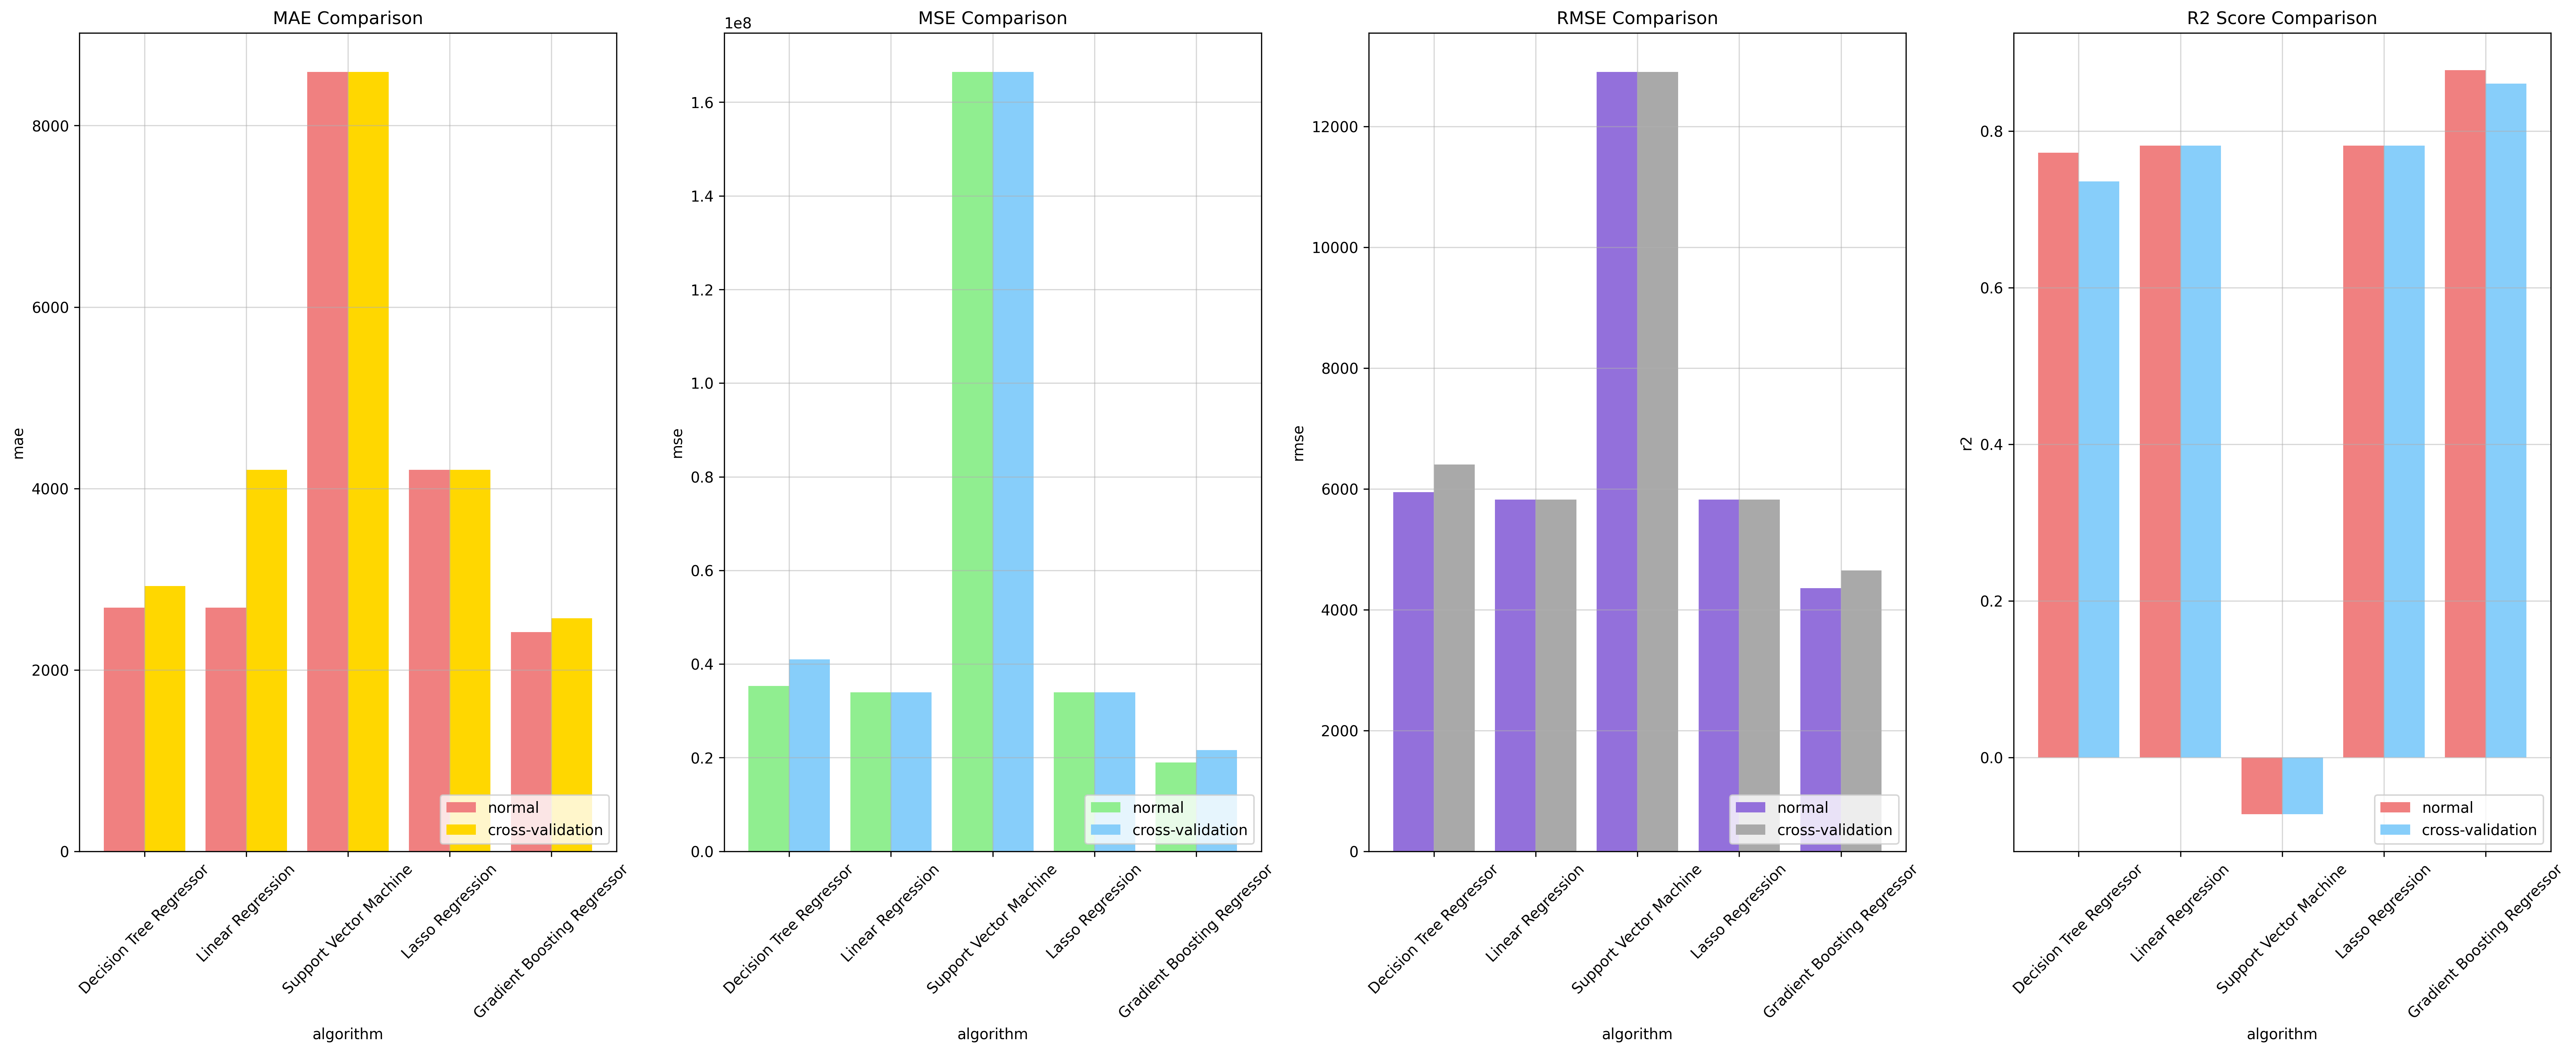

In [69]:
fig, ax = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(30,10), dpi=300)
x_labels = normal_results['ml_algorithm']
indices = np.arange(len(x_labels))
width = 0.4

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices-0.5*width,normal_results['mae'],width,color="lightcoral",alpha=1,label="normal") 
ax[0].bar(indices+0.5*width,cv_results['mae'],width,color="gold",alpha=1,label="cross-validation")
ax[0].grid(True,alpha=0.5)
# ax[0, 0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("mae")
ax[0].set_title("MAE Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices-0.5*width,normal_results['mse'],width,color="lightgreen",alpha=1,label="normal") 
ax[1].bar(indices+0.5*width,cv_results['mse'],width,color="lightskyblue",alpha=1,label="cross-validation")
ax[1].grid(True,alpha=0.5)
# ax[0, 1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("mse")
ax[1].set_title("MSE Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices-0.5*width,normal_results['rmse'],width,color="mediumpurple",alpha=1,label="normal") 
ax[2].bar(indices+0.5*width,cv_results['rmse'],width,color="darkgrey",alpha=1,label="cross-validation")
ax[2].grid(True,alpha=0.5)
# ax[0, 2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("rmse")
ax[2].set_title("RMSE Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices-0.5*width,normal_results['r2'],width,color="lightcoral",alpha=1,label="normal") 
ax[3].bar(indices+0.5*width,cv_results['r2'],width,color="lightskyblue",alpha=1,label="cross-validation")
ax[3].grid(True,alpha=0.5)
# ax[0, 3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("r2")
ax[3].set_title("R2 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

In [71]:
normal_results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2
0,Decision Tree Regressor,2684.822145,3.535392e+07,5945.916022,0.772276,0.771249
1,Linear Regression,2684.822145,3.392761e+07,5824.741112,0.781463,0.780478
2,Support Vector Machine,8592.435460,1.664724e+08,12902.418789,-0.072295,-0.077129
3,Lasso Regression,4207.104528,3.393092e+07,5825.025724,0.781442,0.780456
4,Gradient Boosting Regressor,2416.156153,1.897998e+07,4356.601777,0.877745,0.877194


## Discussion and Conclusion

MAE (Mean Absolute Error) measures mean absolute difference between actual and predicted values. The lower the MAE value, the more accurate the model is. In our case, we see that the Gradient Boosting model has the lowest MAE, which taking into account our target variable, Charges ($), indicates that on average, the model predicts the value of charged amount differs from the actual charged amount by $2416. The next well-performing models are Decision Tree, Linear Regression, and Lasso Regression, with MAE values of $2684, $2684, and $4207 respectively. The worst-performing model is Support Vector Machine, with a MAE value of $8592, which is too big a difference.

MSE (Mean Squared Error) measures mean squared difference between actual and prediced values, and penalizes the error more and to see how the outliers are affecting the predictions. The lower the MSE value, the more accurate the model is. The RMSE is just the squared root of the MSE value. In our case, we see that the Gradient Boosting model has the lowest RMSE of $4356. The next well-performing models are Decision Tree, Linear Regression, and Lasso Regression, with RMSE values of $5945, $5824, and $5825 respectively. The worst-performing model is Support Vector Machine, with a RMSE value of $12902.

R2 measures how the independent variable(s) (X) affect the dependent/target variable, Y. R2 value is usually betweeen 0 and 1, where 0 indicates the model does not explain any variablity in the target variable, and 1 indicates it explains full variability in Y. We find that the Support Vector Machine model has a negative R2 value, which indicates either there is something wrong with the model, or it is not a good fit for our problem. We will disregard it. The other 4 models have R2 values around 0.7, indicating the model explains most variability in the target variable.

Adjusted R2 takes into account the number of features in the model and its degrees of freedom. Its value only increases if the new term improves the accuracy. We see that the adjusted R2 value are proportionate to the R2 values and follow that same pattern, which indicates the model is not too complex.

We also performed techniques to improve the model performances, like cross-validation, hyperparameter tuning, and optimization. The hyperparameter tuning and gradient boosting significantly helped improve the performance of the model because hyperparameter tuning lessens the effect of overfitting/underfitting, leads to improved accuracy, precision, recall, and other performance metrics, and reduces training time and need for resources. Optimization techniques like gradient boosting combine the strengths of multiple weak learners by using other models to provide strength in that area, captures complex patterns (including non-linear ones), and helps with feature selection and managing unbalanced data.